In [1]:
import pandas as pd
model_data = pd.read_csv('model_lefty.csv')

In [3]:
#not sure why there are null values
#going to drop them
model_data.isna().sum()

pitch_name           2082
release_speed        1768
events                  0
description             0
launch_speed            0
launch_angle            0
hit_location            0
release_spin_rate       0
bauer_units             0
dtype: int64

In [ ]:
#dropping the auto csv column
#dropping hit location b/c it was skewing the computer
model_data.drop(columns=['Unnamed: 0'], inplace=True)

In [12]:
model_data.drop(columns=['hit_location'], inplace = True)

In [4]:
model_data.pitch_name.dropna(inplace=True)

In [5]:
model_data.release_speed.dropna(inplace=True)

In [6]:
model_data.pitch_name.isna().value_counts()

False    774421
Name: pitch_name, dtype: int64

In [7]:
#no null values
model_data.pitch_name.isna().value_counts()

False    774421
Name: pitch_name, dtype: int64

In [13]:
#for some reason null values arent dropping
model_data.isnull().sum()

pitch_name           2082
release_speed        1768
events                  0
description             0
launch_speed            0
launch_angle            0
release_spin_rate       0
bauer_units             0
dtype: int64

In [17]:
#going to encode events and descrip cols
#rankings: 0. X 1. 
model_data.events.value_counts()

X               576576
out              86790
strikeout        43285
single           29960
walk             15892
double            8831
home_run          5753
double_play       4815
field_error       1889
hit_by_pitch      1817
triple             887
triple_play          8
Name: events, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
model_data['events'] = encoder.fit_transform(model_data['events'])

In [22]:
#encoded events
model_data.events.value_counts()

0     576576
6      86790
8      43285
7      29960
11     15892
1       8831
5       5753
2       4815
3       1889
4       1817
9        887
10         8
Name: events, dtype: int64

In [23]:
model_data['description']= encoder.fit_transform(model_data['description'])

In [68]:
#going to scale my data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model_data[['release_speed','launch_speed', 'launch_angle', 'release_spin_rate',\
           'bauer_units']] = scaler.fit_transform(model_data[['release_speed', 'launch_speed', 'launch_angle', 'release_spin_rate',\
           'bauer_units']])

In [69]:
#going to need to encode events and description columns to convert to numbers
model_data

,pitch_name,release_speed,events,description,launch_speed,launch_angle,release_spin_rate,bauer_units
0,Cutter,0.750000,6,4,0.609399,0.620112,0.612208,0.539176
1,Slider,0.604575,0,0,0.000000,0.578005,0.564834,0.564595
2,Curveball,0.532680,0,0,0.000000,0.578005,0.640753,0.682611
3,Cutter,0.704248,0,6,0.000000,0.578005,0.631643,0.578038
4,Cutter,0.681373,0,6,0.000000,0.578005,0.604009,0.563682
5,4-Seam Fastball,0.772876,0,0,0.000000,0.578005,0.510780,0.440553
6,Cutter,0.712418,7,2,0.686441,0.513966,0.617067,0.560813
7,Curveball,0.534314,0,0,0.000000,0.578005,0.631947,0.672427
8,Slider,0.580065,0,0,0.000000,0.578005,0.523737,0.479432
9,4-Seam Fastball,0.735294,0,6,0.577812,0.692737,0.608867,0.542815


In [70]:
test_data = model_data.loc[100:750000:70]

In [80]:
#going to test 10,700 rows
test_data.shape

(10691, 8)

In [79]:
test_data.dropna(inplace=True)

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
#dropping null values
test_data.dropna(inplace=True)

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [119]:
X = test_data.drop('pitch_name', axis =1)
y = test_data.pitch_name

In [120]:
X.dropna(inplace= True)

In [121]:
y.dropna(inplace= True)

In [37]:
#going to encode events and description column
X = pd.concat([X, pd.get_dummies(X.events, prefix ='event')], axis=1)

In [38]:
X = pd.concat([X, pd.get_dummies(X.description, prefix ='description')], axis=1)

In [39]:
#have to drop original columns now
X.drop(columns=['events', 'description'], inplace = True)

In [122]:
X.shape

(10691, 7)

In [123]:
y.shape

(10691,)

In [34]:
test_data.dropna(inplace=True)

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [124]:
#train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [85]:
#performing a logistic regression to see the baseline
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [86]:
classifier.fit(X_train,y_train)

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [87]:
 print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.564355200798204
Testing Data Score: 0.5491956603067715


In [88]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Changeup' '4-Seam Fastball' 'Slider' '4-Seam Fastball' '4-Seam Fastball'
 '4-Seam Fastball' '4-Seam Fastball' 'Slider' '4-Seam Fastball'
 '4-Seam Fastball']
First 10 Actual labels: ['Changeup', 'Sinker', 'Slider', 'Slider', '4-Seam Fastball', 'Cutter', '4-Seam Fastball', 'Changeup', '4-Seam Fastball', '2-Seam Fastball']


In [89]:
 pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Changeup,Changeup
1,4-Seam Fastball,Sinker
2,Slider,Slider
3,4-Seam Fastball,Slider
4,4-Seam Fastball,4-Seam Fastball
5,4-Seam Fastball,Cutter
6,4-Seam Fastball,4-Seam Fastball
7,Slider,Changeup
8,4-Seam Fastball,4-Seam Fastball
9,4-Seam Fastball,2-Seam Fastball


In [90]:
#importing SGD cal
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier()
SGD

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [91]:
SGD.fit(X_train,y_train)

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [92]:
#scores are horrible
SGD.score(X_test, y_test)

0.3497942386831276

In [93]:
predict = SGD.predict(X_test)

In [94]:
y_test[:10]

379850           Changeup
521390             Sinker
488280             Slider
614000             Slider
628350    4-Seam Fastball
683510             Cutter
146610    4-Seam Fastball
46230            Changeup
121270    4-Seam Fastball
522370    2-Seam Fastball
Name: pitch_name, dtype: object

In [95]:
predict

array(['Changeup', '4-Seam Fastball', 'Changeup', ..., 'Changeup',
       '4-Seam Fastball', '4-Seam Fastball'], dtype='<U15')

In [59]:
classifier.feature_importances_

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [60]:
SGD.feature_importances_

AttributeError: 'SGDClassifier' object has no attribute 'feature_importances_'

In [98]:
#trying gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [99]:
print(f"R-squared = {model.score(X_train,y_train)}")

R-squared = 0.6580194562234971


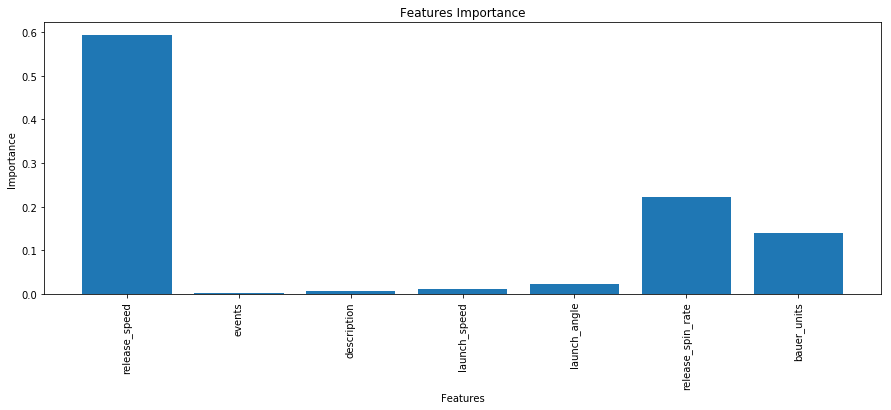

In [100]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(15, 5))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
labels = list(X_train)
plt.xticks(range(len(model.feature_importances_)), labels, rotation='vertical')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Features Importance")
plt.show()

In [101]:
model.fit(X_test, y_test)
# R-squared is 1.0, best possible score
print(f"R-squared = {model.score(X_train,y_train)}")

R-squared = 0.5687203791469194


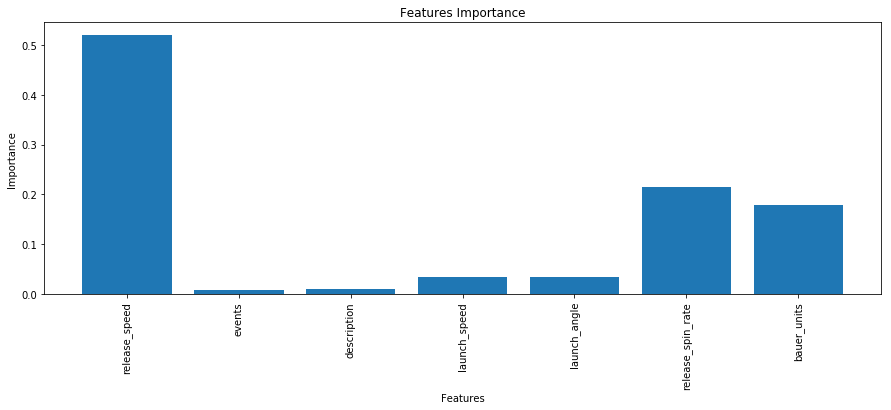

In [102]:
#I think i dont want to get dummies for events, just want to the computer to read it as one column

plt.figure(1, figsize=(15, 5))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
labels = list(X_train)
plt.xticks(range(len(model.feature_importances_)), labels, rotation='vertical')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Features Importance")
plt.show()

In [114]:
test_data['pitch_name'] = encoder.fit_transform(test_data['pitch_name'])

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [118]:
test_data

,pitch_name,release_speed,events,description,launch_speed,launch_angle,release_spin_rate,bauer_units
100,6,0.828431,0,6,0.000000,0.578005,0.475251,0.390606
170,0,0.759804,0,0,0.000000,0.578005,0.462496,0.402951
240,4,0.733660,0,6,0.000000,0.578005,0.503492,0.449074
310,1,0.834967,0,6,0.000000,0.578005,0.492864,0.403237
380,7,0.705882,6,5,0.503852,0.765363,0.634680,0.580018
450,1,0.782680,0,6,0.000000,0.578005,0.543881,0.465626
520,0,0.813725,0,0,0.000000,0.578005,0.529305,0.441431
590,7,0.589869,0,0,0.000000,0.578005,0.101124,0.111066
660,3,0.521242,0,0,0.000000,0.578005,0.216824,0.245177
730,2,0.671569,0,0,0.000000,0.578005,0.510780,0.481173


In [127]:
#going to try SGD regressor
from sklearn.linear_model import SGDRegressor
modeling = SGDRegressor(max_iter=1000, tol=1e-3)
modeling.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=1000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [128]:
modeling.score(X_train, y_train)

0.12994885138225987

In [74]:
#for ordinal encoding
#1 is the highest
#1. swingin_strike 2. strike 3. groundball 4. popup 5 hitbypitch 6. fly_ball 7. line_drive 8. ball
model_data.description.value_counts()

ball               280429
strike             275177
swinging_strike     80303
ground_ball         64707
line_drive          35006
fly_ball            29405
popup                9659
hit_by_pitch         1817
Name: description, dtype: int64

In [100]:
from sklearn.preprocessing import OrdinalEncoder
#the ordinal encoding for the description column
#for more advanced, could use ratio
desc_categories = [ 
        ['ball',0],
        ['line_drive', 1],
        ['fly_ball', 2],
        ['_hit_by_pitch', 3],
        ['popup',4],
        ['ground_ball', 5],
        ['strike', 6],
        ['swinging_strike', 7]
        ]
ordenc = OrdinalEncoder()
test_column = X.description
test_column = test_column.values.reshape(-1, 1)
ordenc.fit(X)
ordenc.transform(X)



array([[2.670e+02, 0.000e+00, 6.000e+00, ..., 0.000e+00, 7.750e+02,
        1.258e+03],
       [2.250e+02, 0.000e+00, 0.000e+00, ..., 0.000e+00, 7.330e+02,
        1.601e+03],
       [2.090e+02, 0.000e+00, 6.000e+00, ..., 0.000e+00, 8.680e+02,
        3.675e+03],
       ...,
       [2.950e+02, 0.000e+00, 6.000e+00, ..., 0.000e+00, 1.343e+03,
        7.186e+03],
       [2.160e+02, 8.000e+00, 7.000e+00, ..., 2.000e+00, 1.288e+03,
        8.175e+03],
       [2.490e+02, 0.000e+00, 6.000e+00, ..., 0.000e+00, 7.810e+02,
        1.570e+03]])

In [95]:
ordenc.categories

[['ball', 0],
 ['line_drive', 1],
 ['fly_ball', 2],
 ['_hit_by_pitch', 3],
 ['popup', 4],
 ['ground_ball', 5],
 ['strike', 6],
 ['swinging_strike', 7]]

In [92]:
X.isna().sum()

release_speed        0
events               0
description          0
launch_speed         0
launch_angle         0
hit_location         0
release_spin_rate    0
bauer_units          0
dtype: int64

In [102]:
#Going to class
#use label encoding for events/descrip - done
#maybe not include hit location - done
#think about scaling data...?? - done with min max
#try and run ordinal regression to rank Y variables!!
#ask ryan or someone about SQLlite database if have time 
#what factors to look at when evaluating a model as well
#https://stats.stackexchange.com/questions/279443/regression-model-when-dependent-variable-is-ranking

In [104]:
from sklearn.linear_model import LogisticRegression
logregress = LogisticRegression(multi_class= 'multinomial', solver='newton-cg')
logregress.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [107]:
logregress.score(X_train, y_train)

0.5838114242953355

In [139]:
from sklearn.metrics import classification_report
classification_report(y_test, predict)

ValueError: Mix of label input types (string and number)

In [138]:
predict = logregress.predict(X_test)

In [110]:
logregress.score(X_test, y_test)

0.5682753460531238

In [134]:
#creating sqlite file
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, Column, Integer, String
from sqlalchemy.ext.declarative import declarative_base
engine = create_engine('sqlite:///leftydata.sqlite')
Base = declarative_base()
4
# class visualdata(Base):
#     __tablename__ = 'visualdata'

#     id = Column(Integer, primary_key=True, autoincrement=True)
#     pitch_velocity = Column(Integer)
#     events = Column(String)
#     description = Column(String)
#     game_year = Column(Integer)
#     exit_velocity = Column(Integer)
#     hit_distance = Column(Integer)
#     pitch_name = Column(String)
    


Base.metadata.create_all(engine)

from sqlalchemy.orm import Session
session = Session(bind=engine)

model_data.to_sql('leftydata',  con=engine, if_exists='replace',chunksize=200)

In [135]:
row_count = pd.read_sql("Select * from leftydata", con=engine)

In [136]:
row_count

,index,pitch_name,release_speed,events,description,launch_speed,launch_angle,release_spin_rate,bauer_units
0,0,Cutter,0.750000,6,4,0.609399,0.620112,0.612208,0.539176
1,1,Slider,0.604575,0,0,0.000000,0.578005,0.564834,0.564595
2,2,Curveball,0.532680,0,0,0.000000,0.578005,0.640753,0.682611
3,3,Cutter,0.704248,0,6,0.000000,0.578005,0.631643,0.578038
4,4,Cutter,0.681373,0,6,0.000000,0.578005,0.604009,0.563682
5,5,4-Seam Fastball,0.772876,0,0,0.000000,0.578005,0.510780,0.440553
6,6,Cutter,0.712418,7,2,0.686441,0.513966,0.617067,0.560813
7,7,Curveball,0.534314,0,0,0.000000,0.578005,0.631947,0.672427
8,8,Slider,0.580065,0,0,0.000000,0.578005,0.523737,0.479432
9,9,4-Seam Fastball,0.735294,0,6,0.577812,0.692737,0.608867,0.542815
